Here we will be investigating the "astronauts(Human and Non Humans)" database from Kaggle user Ram Jas Maurya of web-scraped data from the website supercluster.

## Setup

In [1]:
#Import appropriate libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df = pd.read_csv('astronauts(Human and Non Humans).csv')

## Understand the Data and Summary Stats

In [3]:
#look at the data
df.head().T

,0,1,2,3,4
s.no/code given,612,611,610,609,608
Astronaut name,Cameron Bess,Lane Bess,Evan Dick,Dylan Taylor,Michael Strahan
country,United States of America,United States of America,United States of America,United States of America,United States of America
company space agency,Blue Origin,Blue Origin,Blue Origin,Blue Origin,Blue Origin
missions,1,1,1,1,1
days in space,<.1,<.1,<.1,<.1,<.1
spacewalks,-,-,-,-,-
days spacewalking,-,-,-,-,-
acheivement 1,Crossed Kármán Line,Crossed Kármán Line,Crossed Kármán Line,Crossed Kármán Line,Crossed Kármán Line
acheivement 2,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(952, 13)

In [5]:
#Here it is interesting to note, all data types are stored as objects. 
#If we want to do any calculations later we will need to convert these variables
df.dtypes

s.no/code given         object
Astronaut name          object
country                 object
company space agency    object
missions                object
days in space           object
spacewalks              object
days spacewalking       object
acheivement 1           object
acheivement 2           object
acheivement 3           object
acheivement 4           object
still in space          object
dtype: object

In [6]:
#lets look at these object variables
df.describe(include = object).T 

,count,unique,top,freq
s.no/code given,942,942,612,1
Astronaut name,952,951,Unknown Dog,2
country,952,42,United States of America,523
company space agency,629,22,NASA,364
missions,952,8,1,540
days in space,621,370,<.1,25
spacewalks,621,12,-,379
days spacewalking,621,30,-,379
acheivement 1,734,133,Crossed Kármán Line,325
acheivement 2,403,43,Crossed Kármán Line,266


**Observations:**
- All astronauts have a unique code, and repeated names are likely due to animals, such as "unknown dog" but it's worth looking into.
- Astronauts from 42 unique countries have gone to space! That could be interesting to visualize. 
- They have gone on up to 8 different missions
- Days in space, spacewalks, and days spacewalking all sound like interesting variables that should be converted to float or int. 
- It isn't clear what the achievement columns represent. Though achievement 4 appears to refer to animals which are of interest. 

## Cleaning and Preparing the Data

In [7]:
#check for missing data
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data 
missing_check(df)

,Total,Percent
still in space,942,0.989496
acheivement 3,737,0.774160
acheivement 4,621,0.652311
acheivement 2,549,0.576681
days in space,331,0.347689
spacewalks,331,0.347689
days spacewalking,331,0.347689
company space agency,323,0.339286
acheivement 1,218,0.228992
s.no/code given,10,0.010504


In [8]:
print(df['days in space'].head(10))

0      <.1
1      <.1
2      <.1
3      <.1
4      <.1
5      <.1
6     11.8
7     11.8
8    119.8
9    119.8
Name: days in space, dtype: object


In [9]:
print(df['spacewalks'].head(10))

0    -
1    -
2    -
3    -
4    -
5    -
6    -
7    -
8    1
9    -
Name: spacewalks, dtype: object


In [10]:
print(df['days spacewalking'].head(10))

0      -
1      -
2      -
3      -
4      -
5      -
6      -
7      -
8    0.3
9      -
Name: days spacewalking, dtype: object


**Observations:**
- There are 4 columns we want to convert to numeric. Missions, Spacewalks, Days spacewalking, and days in space
- we need to remove the less than symbol in "days in space" before we convert.
- We might need to change "-" to NaN before we convert. 
- lets batch convert and let python do the work by errors = 'coerce'

In [11]:
# List of columns to convert
numeric_columns = ['days in space', 'spacewalks', 'days spacewalking', 'missions']
#copying data to new dataframe
df_num = df.copy()
# Looping for conversion og columns
for col in numeric_columns:
    df_num[col] = pd.to_numeric(df_num[col], errors = 'coerce')
df_num.dtypes

s.no/code given          object
Astronaut name           object
country                  object
company space agency     object
missions                float64
days in space           float64
spacewalks              float64
days spacewalking       float64
acheivement 1            object
acheivement 2            object
acheivement 3            object
acheivement 4            object
still in space           object
dtype: object

In [12]:
print(df_num[numeric_columns])

     days in space  spacewalks  days spacewalking  missions
0              NaN         NaN                NaN       1.0
1              NaN         NaN                NaN       1.0
2              NaN         NaN                NaN       1.0
3              NaN         NaN                NaN       1.0
4              NaN         NaN                NaN       1.0
..             ...         ...                ...       ...
947            NaN         NaN                NaN       NaN
948            NaN         NaN                NaN       NaN
949            NaN         NaN                NaN       NaN
950            NaN         NaN                NaN       NaN
951            NaN         NaN                NaN       NaN

[952 rows x 4 columns]


## Univariate and Bivariate Analysis

array([[<AxesSubplot:title={'center':'missions'}>,
        <AxesSubplot:title={'center':'days in space'}>],
       [<AxesSubplot:title={'center':'spacewalks'}>,
        <AxesSubplot:title={'center':'days spacewalking'}>]], dtype=object)

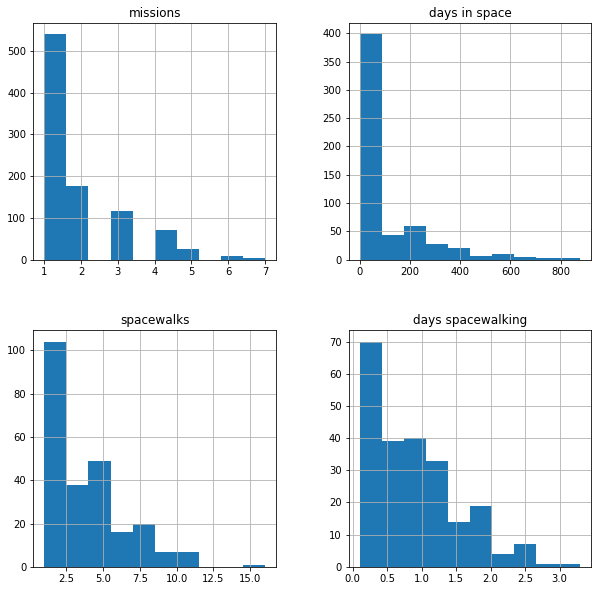

In [13]:
#histograms of continuous data
df_num.hist(figsize=(10,10))

In [29]:
df_num['company space agency'].value_counts()

NASA                      364
CCCP                       86
Roscosmos                  61
ESA                        15
Blue Origin                14
CMS                        14
CSA                         9
Space Adventures, Inc.      9
CNES                        9
SpaceX                      9
NASDA                       8
Virgin Galactic             7
DLR                         7
ASI                         6
JAXA                        3
Scaled Composites           2
MBRSC                       1
KazCosmos                   1
KAP                         1
ANGKASA                     1
SSAU                        1
Project Juno                1
Name: company space agency, dtype: int64

In [30]:
df_num['country'].value_counts()

United States of America    523
USSR                        171
Russia                      115
Japan                        23
China                        22
France                       16
Germany                      12
Canada                       12
Italy                         7
Iran                          6
UK                            4
Netherlands                   3
Israel                        3
Bulgaria                      2
India                         2
Vietnam                       2
Belgium                       2
Argentina                     2
Hungary                       2
United Arab Emirates          1
Czechoslovakia                1
Poland                        1
Cuba                          1
Mongolia                      1
Romania                       1
Saudi Arabia                  1
Mexico                        1
Syria                         1
Australia                     1
Afghanistan                   1
Sweden                        1
Austria 

In [32]:
df_num['acheivement 1'].value_counts()

Crossed Kármán Line                       325
ISS Visitor                               234
Memorial                                   21
Moonwalker                                 12
Crossed 80km Line                           8
                                         ... 
First Yeast (Saccharomyces cerevisiae)      1
First Bacillus safensis                     1
First Deinococcus radiodurans               1
First Haloarcula marismortui                1
First Dog                                   1
Name: acheivement 1, Length: 133, dtype: int64

In [34]:
df_num['acheivement 4'].value_counts()

Dog                            47
Rat                            37
Mouse                          23
Fruit Fly                      17
Monkey                          7
                               ..
Bacillus safensis               1
Haloarcula marismortui          1
Methanothermobacter wolfeii     1
Pyrococcus furiosus             1
Guinea Pig                      1
Name: acheivement 4, Length: 132, dtype: int64

**Observations:**
- By investigating the achievement types, achievement 1,2, and 3 are filled for humans and can have the same achievement in different columns for different people.
- for animals, the achievement type 4 lists the type of animal they are
- for animals, achievement type 1 lists if they were the first of that type in space. 

Next we will break out the dataframes into human and animal

In [70]:
df_num['acheivement 4'].fillna('NaN', inplace=True)

In [74]:
df_human = df_num[df_num['acheivement 4'] == 'NaN']
df_animal = df_num[df_num['acheivement 4'] != 'NaN']

In [76]:
df_human.shape

(621, 14)

In [77]:
df_animal.shape

(331, 14)

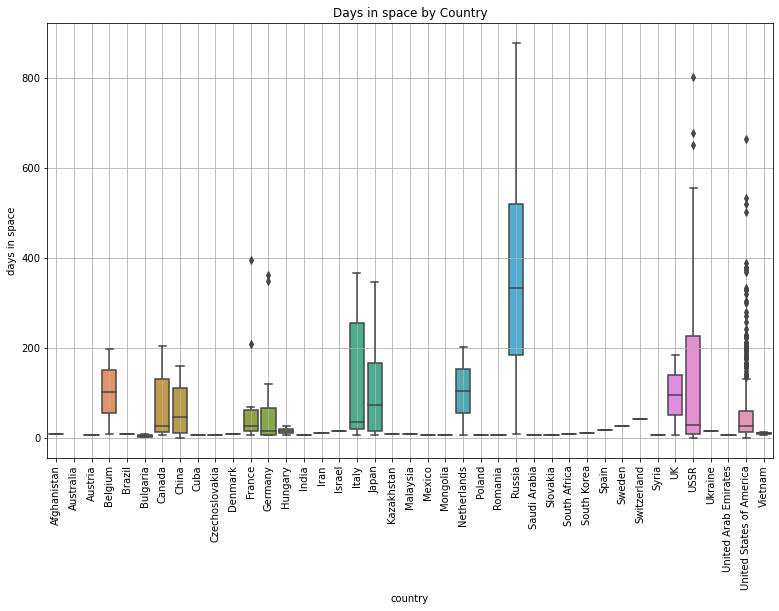

In [93]:
plt.figure(figsize=(13,8))
sns.boxplot(y=df_human["days in space"],  x=df_human["country"].sort_values())
plt.grid(True)
plt.title("Days in space by Country")
plt.xticks(rotation=90)
plt.show()

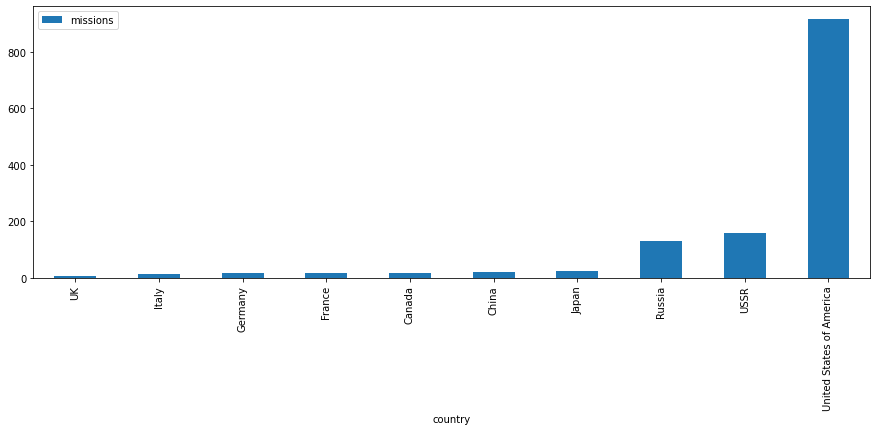

In [103]:
df_human.groupby(by=['country'])['missions'].sum().reset_index().sort_values(['missions']).tail(10).plot(x='country', y='missions',   kind='bar', figsize=(15,5));


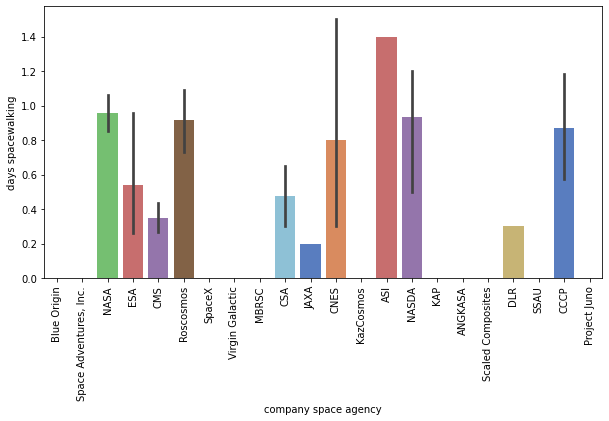

In [101]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.barplot(x='company space agency', y='days spacewalking', 
                 data=df_human, palette='muted')  

output the dataframes as CSV to create a dashboard in tableau

In [107]:
df_animal.to_csv(r'df_animal.csv')
df_human.to_csv(r'df_human.csv')